In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
#cinsiyete gore performansları kontrol edelim

data.groupby('gender').mean()
pd.options.display.float_format = '{:.1f}'.format


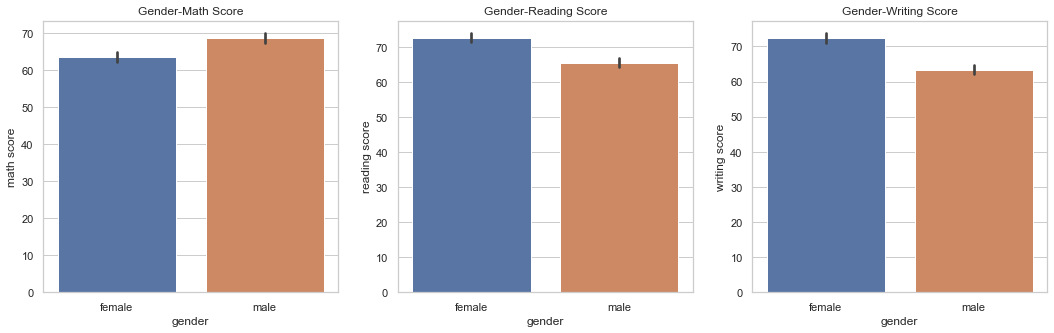

In [13]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(data["gender"], data["math score"])
plt.title("Gender-Math Score")

plt.subplot(1,3,2)
sns.barplot(data["gender"], data["reading score"])
plt.title("Gender-Reading Score")

plt.subplot(1,3,3)
sns.barplot(data["gender"], data["writing score"])
plt.title("Gender-Writing Score")

plt.show()

In [14]:
# Test whether group differences are significant.
gender = data["gender"].unique()
grup_gender = data.groupby("gender")

In [25]:
pd.options.display.float_format = '{:.2f}'.format
for var in ["math score", "reading score", "writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            ttest = stats.ttest_ind(data[data["gender"]==gender[i]][var], 
                                data[data["gender"]==gender[j]][var])
            grup_1 = gender[i]
            grup_2 = gender[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,-5.38,0.00


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,7.96,0.00


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,9.98,0.00


In [26]:
#kokene gore performansları kontrol edelim

data.groupby('race/ethnicity').mean()


,math score,reading score,writing score
race/ethnicity,,,
group A,61.63,64.67,62.67
group B,63.45,67.35,65.60
group C,64.46,69.10,67.83
group D,67.36,70.03,70.15
group E,73.82,73.03,71.41


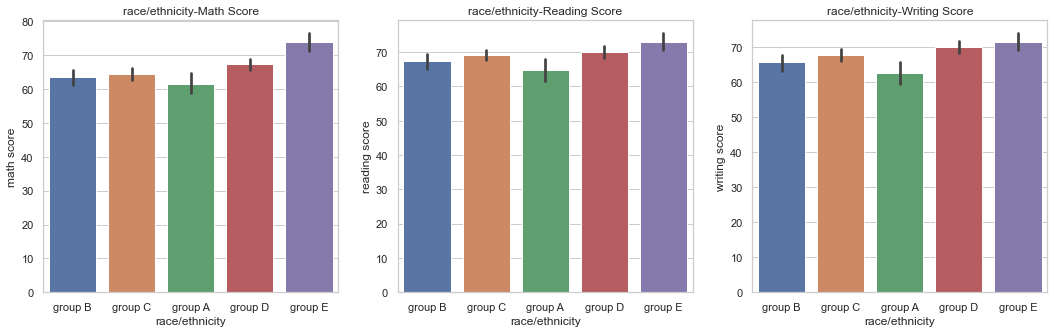

In [17]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(data["race/ethnicity"], data["math score"])
plt.title("race/ethnicity-Math Score")

plt.subplot(1,3,2)
sns.barplot(data["race/ethnicity"], data["reading score"])
plt.title("race/ethnicity-Reading Score")

plt.subplot(1,3,3)
sns.barplot(data["race/ethnicity"], data["writing score"])
plt.title("race/ethnicity-Writing Score")

plt.show()

In [18]:
# Test whether group differences are significant.
ethnicity = data["race/ethnicity"].unique()
grup_ethnicity = data.groupby("race/ethnicity")

In [27]:
pd.options.display.float_format = '{:.2f}'.format
for var in ["math score", "reading score", "writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(ethnicity)):
        for j in range(i+1, len(ethnicity)):
            ttest = stats.ttest_ind(data[data["race/ethnicity"]==ethnicity[i]][var], 
                                data[data["race/ethnicity"]==ethnicity[j]][var])
            grup_1 = ethnicity[i]
            grup_2 = ethnicity[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.73,0.46
1,group B,group A,0.94,0.35
2,group B,group D,-2.83,0.00
3,group B,group E,-6.01,0.00
4,group C,group A,1.60,0.11
5,group C,group D,-2.42,0.02
6,group C,group E,-6.13,0.00
7,group A,group D,-3.35,0.00
8,group A,group E,-5.94,0.00
9,group D,group E,-4.28,0.00


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.32,0.19
1,group B,group A,1.36,0.17
2,group B,group D,-1.95,0.05
3,group B,group E,-3.39,0.00
4,group C,group A,2.58,0.01
5,group C,group D,-0.80,0.43
6,group C,group E,-2.71,0.01
7,group A,group D,-3.05,0.00
8,group A,group E,-4.07,0.00
9,group D,group E,-2.01,0.05


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.60,0.11
1,group B,group A,1.46,0.14
2,group B,group D,-3.20,0.00
3,group B,group E,-3.38,0.00
4,group C,group A,2.85,0.00
5,group C,group D,-1.89,0.06
6,group C,group E,-2.35,0.02
7,group A,group D,-4.16,0.00
8,group A,group E,-4.22,0.00
9,group D,group E,-0.82,0.41


# ODEV 2
## Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?



In [28]:
#ogle yemegine gore performansları kontrol edelim

data.groupby('lunch').mean()


,math score,reading score,writing score
lunch,,,
free/reduced,58.92,64.65,63.02
standard,70.03,71.65,70.82


In [29]:
# Test whether group differences are significant.
lunch = data["lunch"].unique()
grup_lunch = data.groupby("lunch")

In [30]:
pd.options.display.float_format = '{:.2f}'.format
for var in ["math score", "reading score", "writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(lunch)):
        for j in range(i+1, len(lunch)):
            ttest = stats.ttest_ind(data[data["lunch"]==lunch[i]][var], 
                                data[data["lunch"]==lunch[j]][var])
            grup_1 = lunch[i]
            grup_2 = lunch[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,11.84,0.00


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,7.45,0.00


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,8.01,0.00


# ODEV3
## Hazırlık kurslarının sınav performansı üzerinde bir etkisi var mı?



In [31]:
#ogle yemegine gore performansları kontrol edelim

data.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.70,73.89,74.42
none,64.08,66.53,64.50


In [33]:
# Test whether group differences are significant.
course = data["test preparation course"].unique()
grup_course = data.groupby("test preparation course")

In [34]:
pd.options.display.float_format = '{:.2f}'.format
for var in ["math score", "reading score", "writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(course)):
        for j in range(i+1, len(course)):
            ttest = stats.ttest_ind(data[data["test preparation course"]==course[i]][var], 
                                data[data["test preparation course"]==course[j]][var])
            grup_1 = course[i]
            grup_2 = course[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-5.70,0.00


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-7.87,0.00


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-10.41,0.00


## ODEV 5
## Birbiriyle korelasyonu en fazla olan dersler hangisidir?



In [36]:
korelasyon_ogrenciler = data.corr()
korelasyon_ogrenciler

,math score,reading score,writing score
math score,1.00,0.82,0.80
reading score,0.82,1.00,0.95
writing score,0.80,0.95,1.00


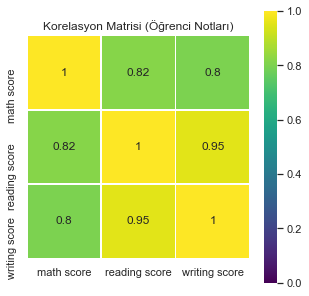

In [43]:
plt.figure(figsize=(5,5))
sns.heatmap(korelasyon_ogrenciler, square=True, annot=True, linewidths=.7, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)")

plt.show()